In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [8]:
gen_df=pd.read_csv('data/0826export.csv')

In [9]:
gen_df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,...,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,...,0.0,2,934,467.0,1,47,47.0,4,1267,317
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,...,0.0,2,948,474.0,1,54,54.0,4,1295,324
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,...,0.0,2,962,481.0,1,61,61.0,4,1323,331
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,...,0.0,2,976,488.0,1,68,68.0,4,1351,338
4,7,1504,05-MAR-16,2017,5,2,19920.51,24553.82,-0.188700,2016,...,0.0,2,990,495.0,1,75,75.0,4,1379,345


In [10]:
gen_df.describe()

,DIV,STORE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,...,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS
count,27193.0,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,...,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000
mean,7.0,1849.115140,2018.327106,25.091604,6.245578,19656.286191,19315.195964,0.058969,2017.332880,25.088920,...,1161.864564,0.749825,950.980583,564.062410,2.395433,1493.091090,560.296891,5.078476,6359.574339,1278.288935
std,0.0,185.155235,1.032735,14.922168,3.420868,11694.990603,11283.140420,1.521825,1.033685,14.921954,...,1895.561291,1.005374,2449.775044,1269.271852,1.602152,2066.809565,862.378589,1.842510,5950.355802,1137.799402
min,7.0,1504.000000,2017.000000,1.000000,1.000000,1325.200000,34.990000,-0.808137,2016.000000,1.000000,...,-1.000000,0.000000,-8.000000,-8.000000,0.000000,-2.000000,-2.000000,1.000000,-8.000000,-8.000000
25%,7.0,1687.000000,2017.000000,12.000000,3.000000,12009.140000,11876.960000,-0.136624,2016.000000,12.000000,...,93.000000,0.000000,0.000000,0.000000,1.000000,238.000000,134.500000,4.000000,2254.000000,486.000000
50%,7.0,1832.000000,2018.000000,24.000000,6.000000,16525.240000,16302.920000,0.013490,2017.000000,24.000000,...,535.000000,0.000000,0.000000,0.000000,2.000000,815.000000,344.500000,5.000000,4342.000000,876.000000
75%,7.0,2038.000000,2019.000000,38.000000,9.000000,23662.610000,23332.910000,0.185623,2018.000000,38.000000,...,1300.000000,1.000000,632.000000,481.000000,3.000000,1942.000000,695.250000,6.000000,8729.000000,1681.000000
max,7.0,2089.000000,2020.000000,53.000000,12.000000,114223.590000,114223.590000,245.175193,2019.000000,53.000000,...,14005.000000,7.000000,22312.000000,9434.000000,12.000000,19550.000000,13781.000000,17.000000,33969.000000,7943.000000


In [11]:
traffcomp=gen_df[['STORE','FISCAL_YEAR', 'FISCAL_WEEK', 'STRAK_TRAFFIC', 'STRAK_TRANSACTION_NUM', 'COMP_PCT']]

In [12]:
traffcomp.shape

(27193, 6)

In [13]:
storegroup=traffcomp.groupby('STORE')

In [14]:
storegroup.head()

,STORE,FISCAL_YEAR,FISCAL_WEEK,STRAK_TRAFFIC,STRAK_TRANSACTION_NUM,COMP_PCT
0,1504,2017,1,1168,114,0.034622
1,1504,2017,2,891,94,-0.255050
2,1504,2017,3,930,79,-0.327715
3,1504,2017,4,812,72,-0.261691
4,1504,2017,5,1012,114,-0.188700
162,1505,2017,1,1685,168,-0.024183
163,1505,2017,2,1428,173,-0.116463
164,1505,2017,3,1602,167,-0.050870
165,1505,2017,4,1255,163,0.044839
166,1505,2017,5,1261,177,-0.081594


In [15]:
traffavg=storegroup[['STRAK_TRAFFIC', 'STRAK_TRANSACTION_NUM', 'COMP_PCT']].mean()

In [16]:
traffavg.head()

,STRAK_TRAFFIC,STRAK_TRANSACTION_NUM,COMP_PCT
STORE,,,
1504,1060.598765,93.030864,-0.041804
1505,1718.377143,185.577143,-0.022032
1508,1724.505952,217.619048,0.074747
1514,516.733333,67.650000,0.072270
1521,870.139241,108.854430,0.050585


In [17]:
traffavg.shape

(174, 3)

In [39]:
comp_pctneg=traffavg[traffavg.COMP_PCT <= 0]

In [40]:
comp_pctneg.head()

,STRAK_TRAFFIC,STRAK_TRANSACTION_NUM,COMP_PCT
STORE,,,
1504,1060.598765,93.030864,-0.041804
1505,1718.377143,185.577143,-0.022032
1565,854.754190,116.793296,-0.002271
1578,539.602410,119.759036,-0.024448
1600,989.911243,79.313609,-0.063231


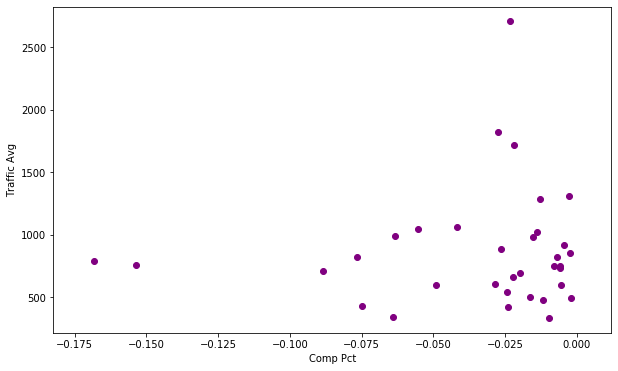

In [44]:
plt.figure(figsize=(10,6))
plt.scatter('COMP_PCT', 'STRAK_TRAFFIC', data=comp_pctneg, color='purple')
plt.xlabel('Comp Pct')
plt.ylabel('Traffic Avg')
plt.show()

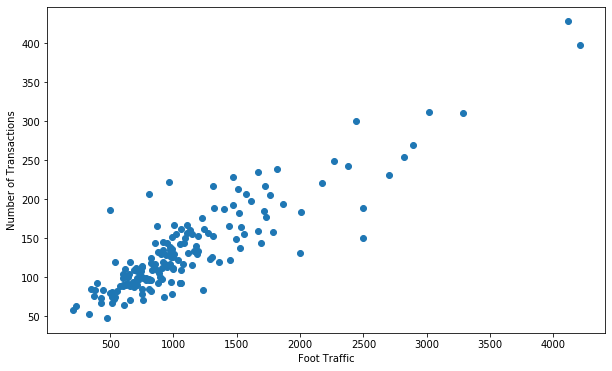

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter('STRAK_TRAFFIC', 'STRAK_TRANSACTION_NUM', data=traffavg)
plt.xlabel('Foot Traffic')
plt.ylabel('Number of Transactions')
plt.show()

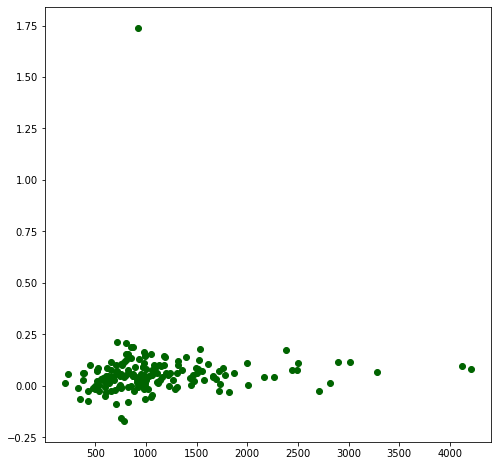

In [19]:
plt.figure(figsize=(8,8))
plt.scatter('STRAK_TRAFFIC','COMP_PCT', data=traffavg, color='darkgreen')

In [20]:
traffavghigh=traffavg.nlargest(20, 'STRAK_TRAFFIC')

In [21]:
traffavghigh=traffavghigh.reset_index()

In [22]:
traffavghigh

,STORE,STRAK_TRAFFIC,STRAK_TRANSACTION_NUM,COMP_PCT
0,1723,4207.983146,398.185393,0.080638
1,1710,4118.380682,428.181818,0.094736
2,1701,3283.250000,311.296875,0.066038
3,1722,3014.329545,311.500000,0.114132
4,1705,2894.522222,269.655556,0.114509
5,2058,2820.187135,254.368421,0.012721
6,2029,2704.121387,231.028902,-0.023431
7,1843,2497.312500,150.321429,0.111170
8,1726,2496.080460,188.821839,0.079462
9,1719,2439.864407,301.135593,0.076276


[Text(0, 0, '1723'),
 Text(0, 0, '1710'),
 Text(0, 0, '1701'),
 Text(0, 0, '1722'),
 Text(0, 0, '1705'),
 Text(0, 0, '2058'),
 Text(0, 0, '2029'),
 Text(0, 0, '1843'),
 Text(0, 0, '1726'),
 Text(0, 0, '1719'),
 Text(0, 0, '1718'),
 Text(0, 0, '1712'),
 Text(0, 0, '1724'),
 Text(0, 0, '1706'),
 Text(0, 0, '1730'),
 Text(0, 0, '1819'),
 Text(0, 0, '1854'),
 Text(0, 0, '2013'),
 Text(0, 0, '1547'),
 Text(0, 0, '2044')]

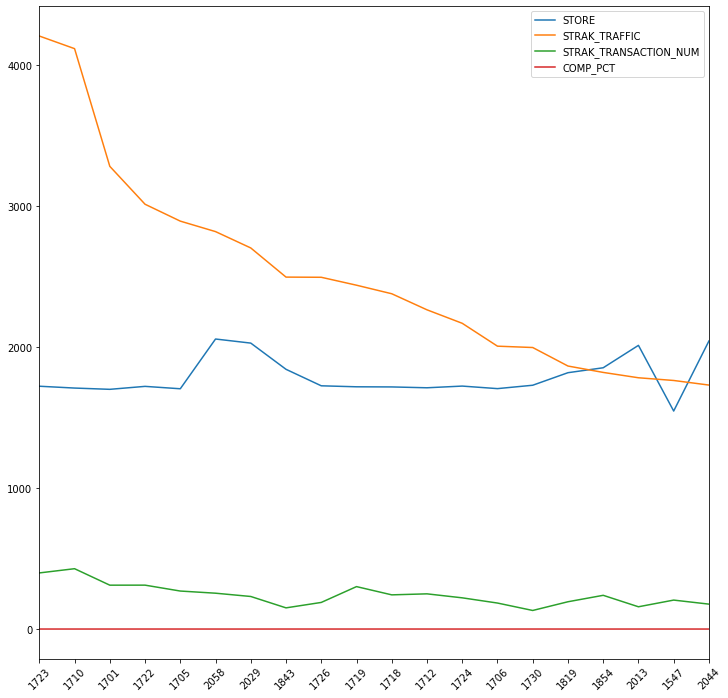

In [24]:
fig, ax = plt.subplots()
traffavghigh.plot(ax=ax,figsize=(12,12), xticks=traffavghigh.index, rot=45)
ax.set_xticklabels(traffavghigh.STORE)

In [25]:
traffavglow=traffavg.nsmallest(20, 'STRAK_TRAFFIC')

In [26]:
traffavglow

,STRAK_TRAFFIC,STRAK_TRANSACTION_NUM,COMP_PCT
STORE,,,
2050,203.354286,58.011429,0.015429
1824,233.769231,62.715976,0.058777
2016,334.933735,52.921687,-0.009638
1817,346.077778,85.605556,-0.064134
1825,374.916201,75.687151,0.064187
1831,382.948571,83.908571,0.027941
1820,394.341463,92.280488,0.061927
2035,424.634831,73.842697,-0.024075
1803,431.739394,67.660606,-0.074936


In [27]:
weekgroup=traffcomp.groupby('FISCAL_WEEK')

In [28]:
weekgroup.head()

,STORE,FISCAL_YEAR,FISCAL_WEEK,STRAK_TRAFFIC,STRAK_TRANSACTION_NUM,COMP_PCT
0,1504,2017,1,1168,114,0.034622
1,1504,2017,2,891,94,-0.255050
2,1504,2017,3,930,79,-0.327715
3,1504,2017,4,812,72,-0.261691
4,1504,2017,5,1012,114,-0.188700
5,1504,2017,6,894,93,-0.132316
6,1504,2017,7,917,103,0.604112
7,1504,2017,8,1044,83,-0.458713
8,1504,2017,9,1136,85,0.194332
9,1504,2017,10,978,102,0.031316


In [29]:
firstweek=weekgroup.get_group(1)

In [30]:
firstweek.head()

,STORE,FISCAL_YEAR,FISCAL_WEEK,STRAK_TRAFFIC,STRAK_TRANSACTION_NUM,COMP_PCT
0,1504,2017,1,1168,114,0.034622
52,1504,2018,1,1066,123,0.033046
99,1504,2019,1,732,94,-0.013151
162,1505,2017,1,1685,168,-0.024183
214,1505,2018,1,1696,169,-0.020459


In [31]:
midyearweek=weekgroup.get_group(26)

In [32]:
endyearweek=weekgroup.get_group(52)

In [33]:
type(firstweek)

pandas.core.frame.DataFrame

In [34]:
firstweek.shape

(591, 6)

In [35]:
firstweek2017=firstweek[firstweek.FISCAL_YEAR == 2017]

In [36]:
firstweek2017.head()

,STORE,FISCAL_YEAR,FISCAL_WEEK,STRAK_TRAFFIC,STRAK_TRANSACTION_NUM,COMP_PCT
0,1504,2017,1,1168,114,0.034622
162,1505,2017,1,1685,168,-0.024183
337,1508,2017,1,1496,182,-0.247213
505,1514,2017,1,591,75,0.044092
685,1521,2017,1,1031,125,0.102618


In [37]:
firstweek17high=firstweek2017.nlargest(50, 'STRAK_TRAFFIC')

In [38]:
firstweek17high.head()

,STORE,FISCAL_YEAR,FISCAL_WEEK,STRAK_TRAFFIC,STRAK_TRANSACTION_NUM,COMP_PCT
8583,1710,2017,1,4133,383,0.274368
10363,1726,2017,1,3752,240,0.691380
10011,1723,2017,1,3327,339,0.384228
9835,1722,2017,1,2980,259,0.249293
7925,1705,2017,1,2752,212,0.193880
